In [3]:
def calculate_iou(y_true, y_pred):
    """
    Calculate Intersection over Union (IoU).
    Args:
    - y_true: Ground truth mask (binary).
    - y_pred: Predicted mask (binary).
    Returns:
    - IoU value.
    """
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    return intersection / union if union != 0 else 0

def calculate_dice(y_true, y_pred):
    """
    Calculate Dice Coefficient.
    Args:
    - y_true: Ground truth mask (binary).
    - y_pred: Predicted mask (binary).
    Returns:
    - Dice coefficient value.
    """
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    intersection = np.sum(y_true * y_pred)
    return (2 * intersection) / (np.sum(y_true) + np.sum(y_pred)) if (np.sum(y_true) + np.sum(y_pred)) != 0 else 0


In [8]:
# Predict masks
predicted_masks = model.predict(test_images, batch_size=8)

# Align the number of predictions with ground truth
predicted_masks = predicted_masks[:585]

# Remove unnecessary dimensions
predicted_masks = np.squeeze(predicted_masks, axis=-1)

# Ensure binary masks
test_masks = (test_masks > 0.5).astype(np.uint8)
predicted_masks = (predicted_masks > 0.5).astype(np.uint8)

# Check shapes
print(f"Updated test masks shape: {test_masks.shape}")
print(f"Updated predicted masks shape: {predicted_masks.shape}")


75/75 ━━━━━━━━━━━━━━━━━━━━ -0s -1674us/step
Updated test masks shape: (585, 256, 256)
Updated predicted masks shape: (585, 256, 256)


In [9]:
ious = [calculate_iou(true_mask, pred_mask) for true_mask, pred_mask in zip(test_masks, predicted_masks)]
dice_scores = [calculate_dice(true_mask, pred_mask) for true_mask, pred_mask in zip(test_masks, predicted_masks)]

mean_iou = np.mean(ious)
mean_dice = np.mean(dice_scores)

print(f"Mean IoU: {mean_iou:.4f}")
print(f"Mean Dice Coefficient: {mean_dice:.4f}")


Mean IoU: 0.0000
Mean Dice Coefficient: 0.0000


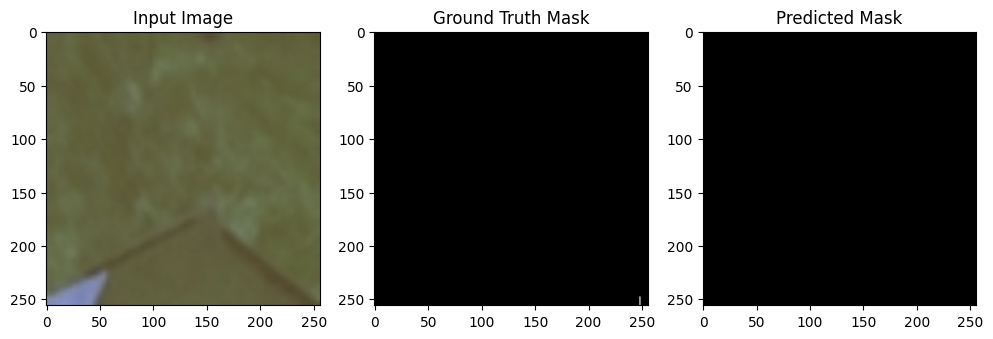

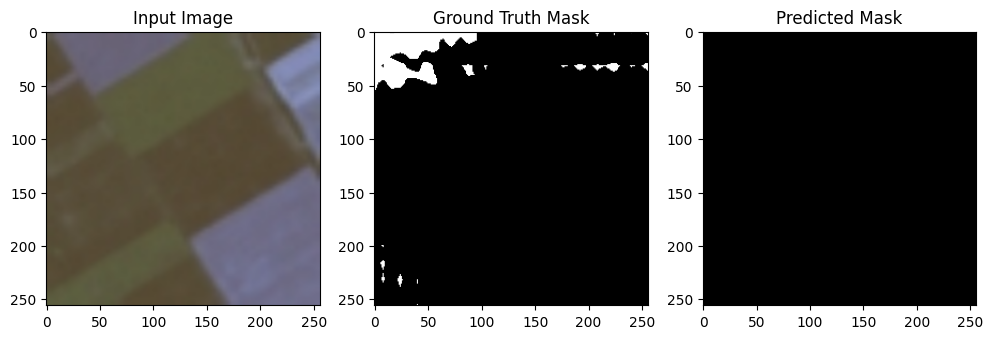

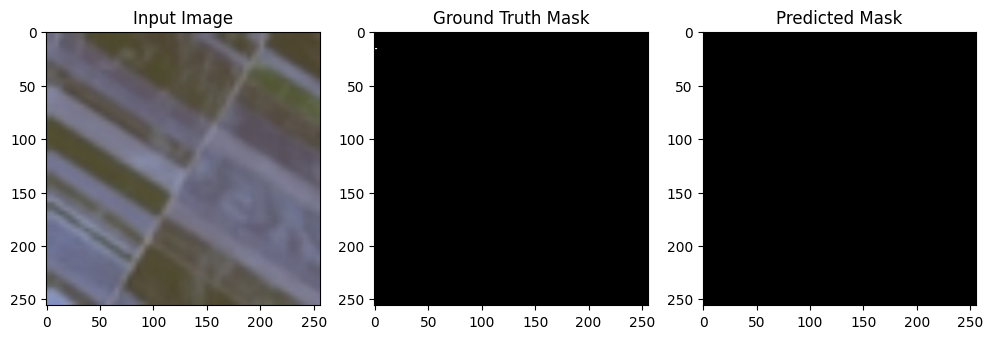

In [10]:
import matplotlib.pyplot as plt

# Visualize a few predictions alongside ground truth
for i in range(3):  # Change 3 to the number of examples you want to inspect
    plt.figure(figsize=(12, 6))
    
    # Input image
    plt.subplot(1, 3, 1)
    plt.title("Input Image")
    plt.imshow(test_images[i])  # Ensure test_images is loaded correctly

    # Ground truth mask
    plt.subplot(1, 3, 2)
    plt.title("Ground Truth Mask")
    plt.imshow(test_masks[i], cmap="gray")

    # Predicted mask
    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(predicted_masks[i], cmap="gray")

    plt.show()


In [11]:
# Check unique values in predicted masks before thresholding
print("Unique values in predicted masks (before thresholding):", np.unique(model.predict(test_images)))

# Check unique values in predicted masks after thresholding
print("Unique values in predicted masks (after thresholding):", np.unique(predicted_masks))

# Check unique values in test masks
print("Unique values in test masks:", np.unique(test_masks))


19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 459ms/step
Unique values in predicted masks (before thresholding): [0.0000000e+00 2.9722647e-39 2.9747605e-39 ... 1.1534056e-08 2.4048990e-08
 2.7310394e-08]
Unique values in predicted masks (after thresholding): [0]
Unique values in test masks: [0 1]


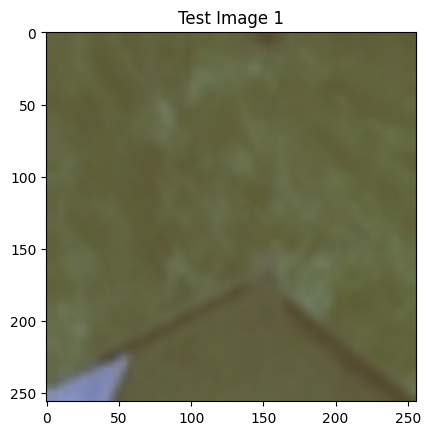

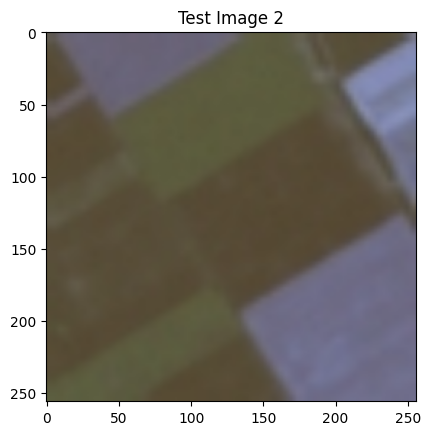

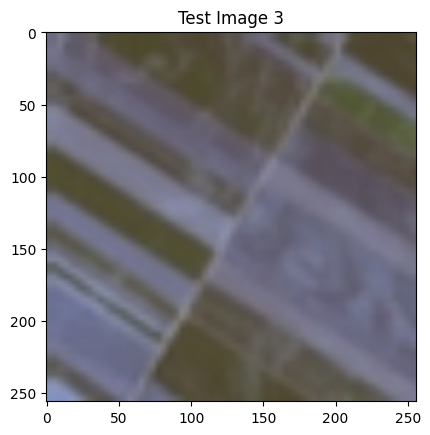

In [12]:
import matplotlib.pyplot as plt

# Visualize a few test images
for i in range(3):
    plt.imshow(test_images[i])
    plt.title(f"Test Image {i+1}")
    plt.show()


Aligned test images shape: (585, 256, 256, 3)
Test masks shape: (585, 256, 256)
Test images range after normalization: 0.09019608050584793 to 1.0
Test masks unique values: [0 1]
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step  
Unique values in predicted masks (before thresholding): [0.0000000e+00 2.9722647e-39 2.9747380e-39 ... 1.1534122e-08 2.4048990e-08
 2.7310447e-08]
Mean IoU (Soft): 0.0000
Mean Dice Coefficient (Soft): 0.0000
Mean IoU (Binary): 0.0000
Mean Dice Coefficient (Binary): 0.0000


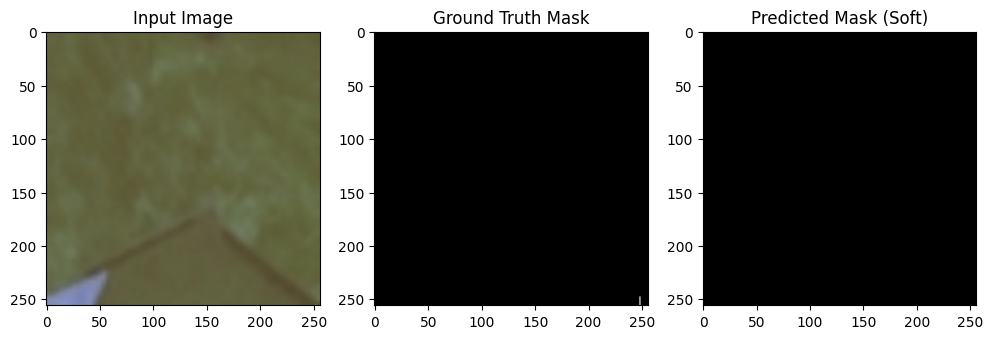

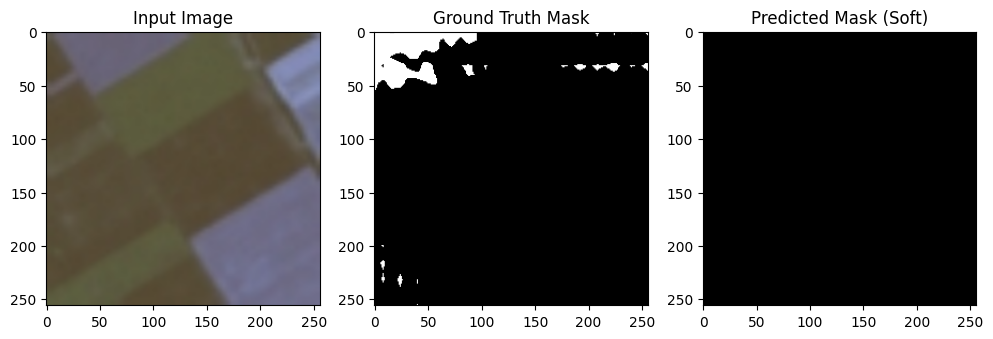

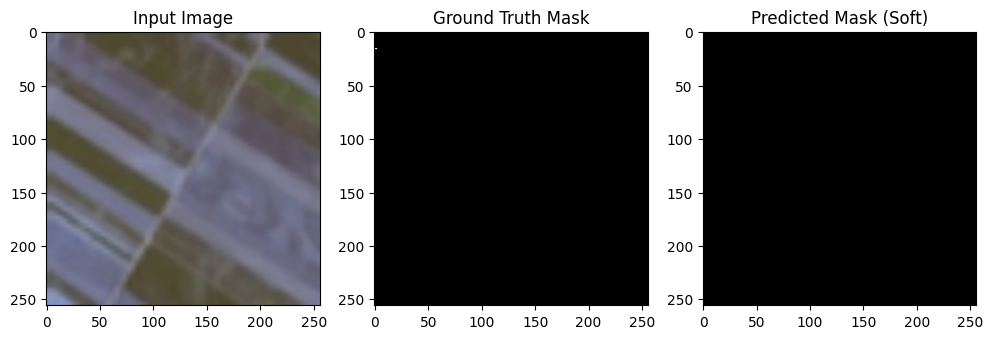

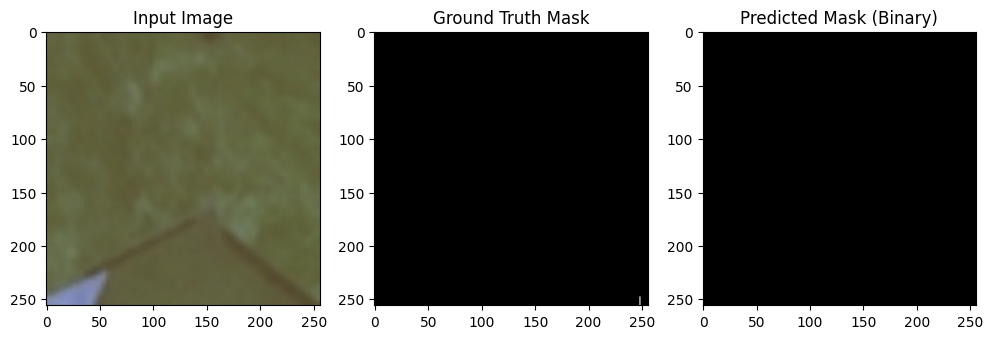

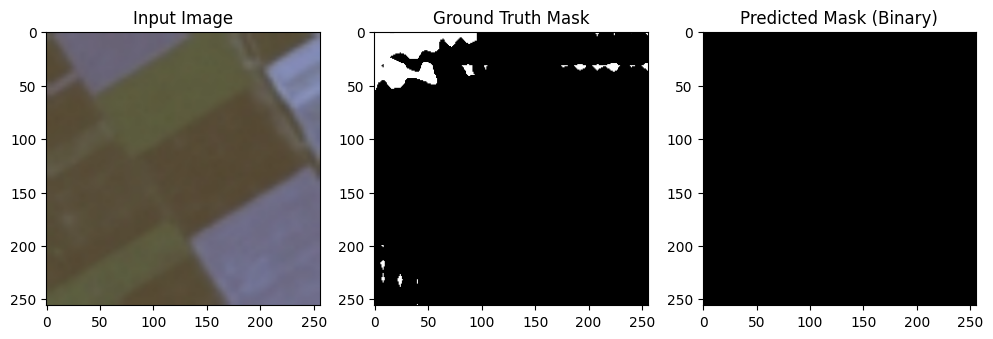

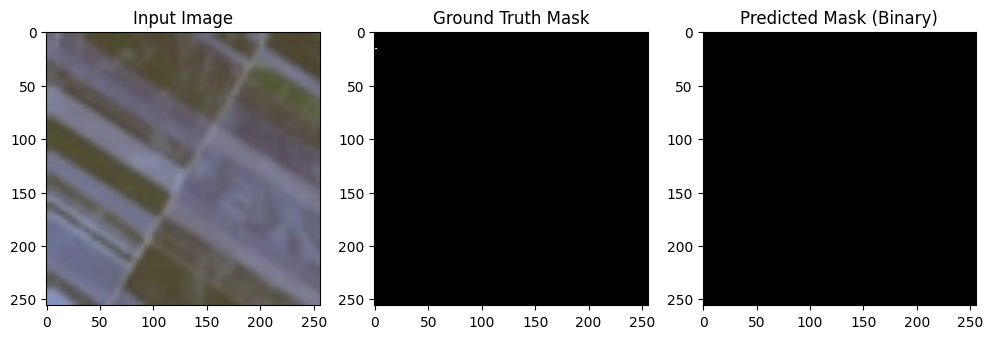

In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the U-Net model
model = tf.keras.models.load_model("unet_best_model.keras")

# Load test data
test_images = np.load("../data/training_data/AnnualCrop_test.npy")  # Replace with actual path
test_masks = np.load("../data/training_data/AnnualCrop_test_masks_combined.npy")  # Replace with actual path

# Align the number of test images and masks
test_images = test_images[:585]  # Truncate test images to match test masks
print(f"Aligned test images shape: {test_images.shape}")
print(f"Test masks shape: {test_masks.shape}")

# Ensure correct normalization for test images
test_images = test_images.astype(np.float32)
if test_images.max() > 1:  # Normalize only if needed
    test_images = test_images / 255.0
print(f"Test images range after normalization: {test_images.min()} to {test_images.max()}")

# Ensure binary ground truth masks
test_masks = (test_masks > 0.5).astype(np.uint8)
print(f"Test masks unique values: {np.unique(test_masks)}")

# Predict masks
predicted_masks = model.predict(test_images, batch_size=8)

# Check unique values in predictions
print("Unique values in predicted masks (before thresholding):", np.unique(predicted_masks))

# Calculate IoU and Dice Coefficients
def calculate_iou(y_true, y_pred):
    """Calculate Intersection over Union (IoU)."""
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    return intersection / union if union != 0 else 0

def calculate_dice(y_true, y_pred):
    """Calculate Dice Coefficient."""
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection) / (np.sum(y_true) + np.sum(y_pred)) if (np.sum(y_true) + np.sum(y_pred)) != 0 else 0

# Option 1: Metrics for soft predictions (no thresholding)
ious = [calculate_iou(gt, pred.squeeze()) for gt, pred in zip(test_masks, predicted_masks)]
dice_scores = [calculate_dice(gt, pred.squeeze()) for gt, pred in zip(test_masks, predicted_masks)]
mean_iou = np.mean(ious)
mean_dice = np.mean(dice_scores)
print(f"Mean IoU (Soft): {mean_iou:.4f}")
print(f"Mean Dice Coefficient (Soft): {mean_dice:.4f}")

# Option 2: Metrics for binary predictions (thresholded)
binary_predictions = (predicted_masks > 0.5).astype(np.uint8)
ious_binary = [calculate_iou(gt, pred.squeeze()) for gt, pred in zip(test_masks, binary_predictions)]
dice_scores_binary = [calculate_dice(gt, pred.squeeze()) for gt, pred in zip(test_masks, binary_predictions)]
mean_iou_binary = np.mean(ious_binary)
mean_dice_binary = np.mean(dice_scores_binary)
print(f"Mean IoU (Binary): {mean_iou_binary:.4f}")
print(f"Mean Dice Coefficient (Binary): {mean_dice_binary:.4f}")

# Visualize test results
def visualize_predictions(images, ground_truths, predictions, num_samples=3, binary=False):
    for i in range(num_samples):
        plt.figure(figsize=(12, 6))
        
        # Input image
        plt.subplot(1, 3, 1)
        plt.title("Input Image")
        plt.imshow(images[i])

        # Ground truth mask
        plt.subplot(1, 3, 2)
        plt.title("Ground Truth Mask")
        plt.imshow(ground_truths[i], cmap="gray")

        # Predicted mask
        plt.subplot(1, 3, 3)
        plt.title("Predicted Mask (Binary)" if binary else "Predicted Mask (Soft)")
        plt.imshow(predictions[i].squeeze(), cmap="gray")

        plt.show()

# Visualize soft predictions
visualize_predictions(test_images, test_masks, predicted_masks, num_samples=3, binary=False)

# Visualize binary predictions
visualize_predictions(test_images, test_masks, binary_predictions, num_samples=3, binary=True)


Test images shape: (585, 256, 256, 3)
Test masks shape: (585, 256, 256)
Test images range: 0.09019608050584793 to 1.0
Test masks unique values: [0 1]


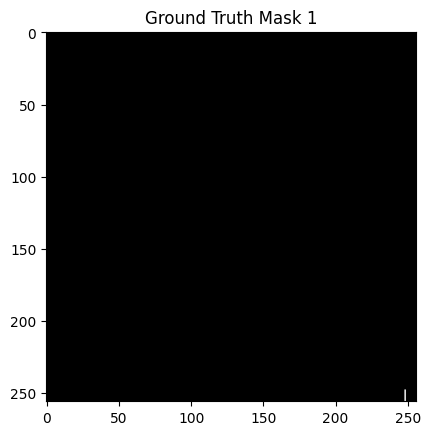

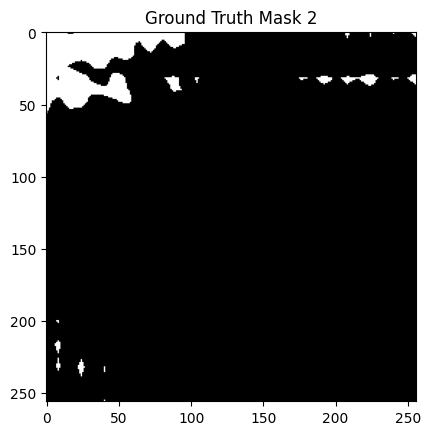

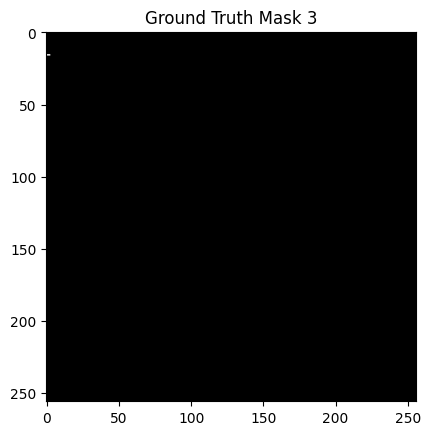

74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step  
Unique values in predicted masks (before thresholding): [0.0000000e+00 2.9722647e-39 2.9747380e-39 ... 1.1534122e-08 2.4048990e-08
 2.7310447e-08]
Unique values in binary predicted masks: [0]


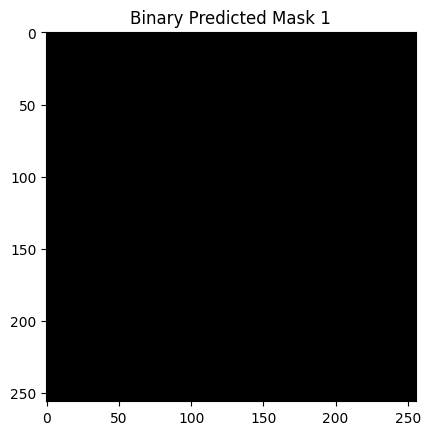

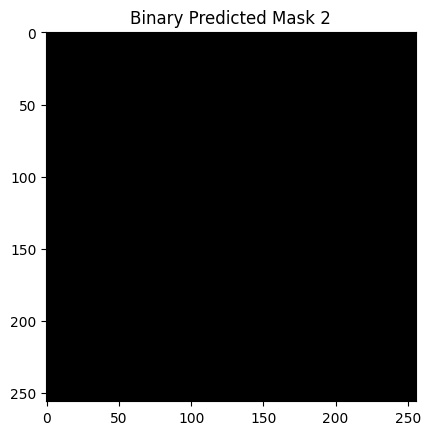

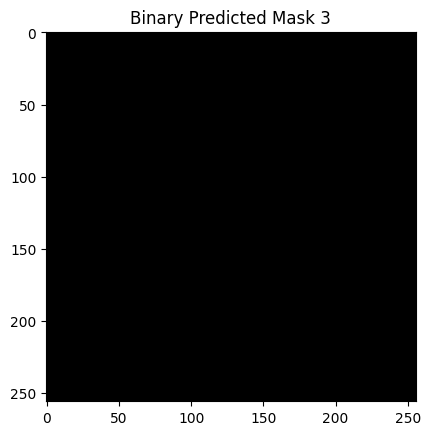

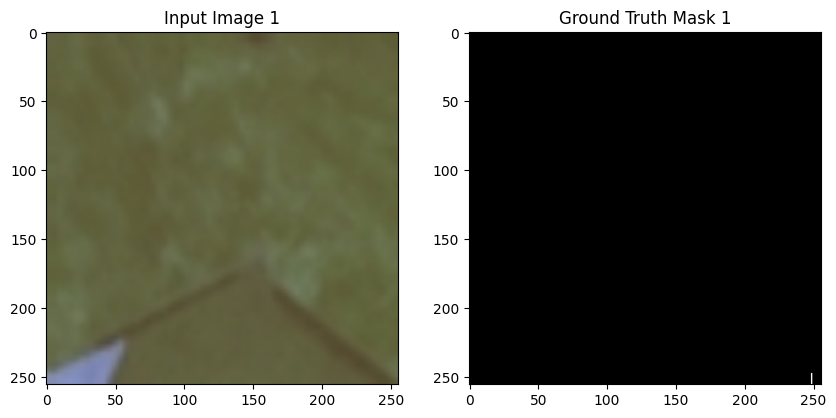

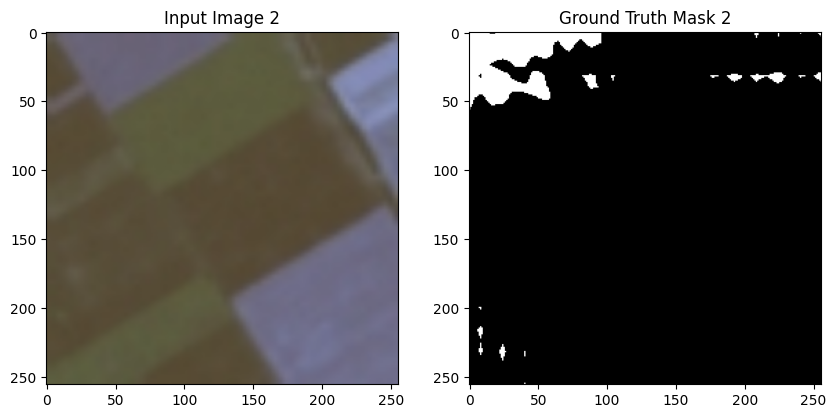

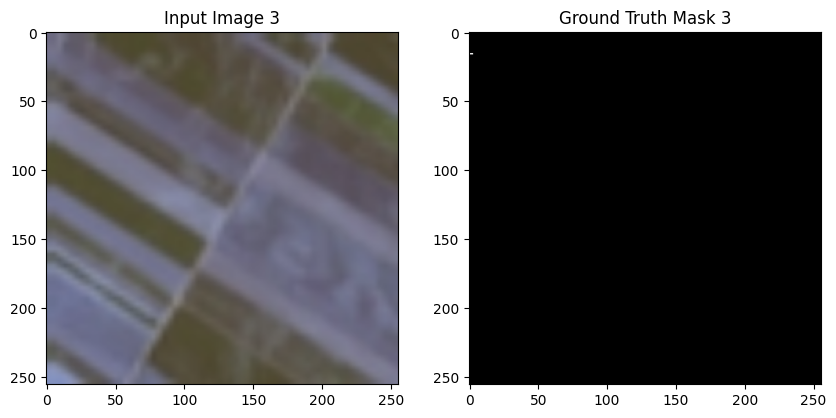

Mean IoU: 0.0000
Mean Dice Coefficient: 0.0000


In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the U-Net model
model = tf.keras.models.load_model("unet_best_model.keras")

# Load test data
test_images = np.load("../data/training_data/AnnualCrop_test.npy")  # Replace with actual path
test_masks = np.load("../data/training_data/AnnualCrop_test_masks_combined.npy")  # Replace with actual path

# Align test images and masks
test_images = test_images[:585]  # Match the number of test masks
print(f"Test images shape: {test_images.shape}")
print(f"Test masks shape: {test_masks.shape}")

# Normalize test images (if needed)
test_images = test_images.astype(np.float32)
if test_images.max() > 1:
    test_images = test_images / 255.0
print(f"Test images range: {test_images.min()} to {test_images.max()}")

# Ensure binary ground truth masks
if test_masks.max() > 1:  # Normalize if values are in [0, 255]
    test_masks = (test_masks / 255.0).astype(np.float32)
test_masks = (test_masks > 0.5).astype(np.uint8)
print(f"Test masks unique values: {np.unique(test_masks)}")

# Visualize ground truth masks
def visualize_ground_truth_masks(masks, num_samples=3):
    for i in range(num_samples):
        plt.imshow(masks[i], cmap="gray")
        plt.title(f"Ground Truth Mask {i+1}")
        plt.show()

visualize_ground_truth_masks(test_masks)

# Predict masks
predicted_masks = model.predict(test_images, batch_size=8)

# Check unique values in predictions
print("Unique values in predicted masks (before thresholding):", np.unique(predicted_masks))

# Binarize predictions
threshold = 0.5
binary_predictions = (predicted_masks > threshold).astype(np.uint8)
print("Unique values in binary predicted masks:", np.unique(binary_predictions))

# Visualize binary predictions
def visualize_binary_predictions(predictions, num_samples=3):
    for i in range(num_samples):
        plt.imshow(predictions[i].squeeze(), cmap="gray")
        plt.title(f"Binary Predicted Mask {i+1}")
        plt.show()

visualize_binary_predictions(binary_predictions)

# Visualize input images and their corresponding ground truth masks
def visualize_image_and_mask(images, masks, num_samples=3):
    for i in range(num_samples):
        plt.figure(figsize=(10, 5))

        # Input image
        plt.subplot(1, 2, 1)
        plt.imshow(images[i])
        plt.title(f"Input Image {i+1}")

        # Ground truth mask
        plt.subplot(1, 2, 2)
        plt.imshow(masks[i], cmap="gray")
        plt.title(f"Ground Truth Mask {i+1}")

        plt.show()

visualize_image_and_mask(test_images, test_masks)

# Calculate IoU and Dice Coefficient
def calculate_iou(y_true, y_pred):
    """Calculate Intersection over Union (IoU)."""
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    return intersection / union if union != 0 else 0

def calculate_dice(y_true, y_pred):
    """Calculate Dice Coefficient."""
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection) / (np.sum(y_true) + np.sum(y_pred)) if (np.sum(y_true) + np.sum(y_pred)) != 0 else 0

# Metrics for binary predictions
ious = [calculate_iou(gt, pred.squeeze()) for gt, pred in zip(test_masks, binary_predictions)]
dice_scores = [calculate_dice(gt, pred.squeeze()) for gt, pred in zip(test_masks, binary_predictions)]
mean_iou = np.mean(ious)
mean_dice = np.mean(dice_scores)

print(f"Mean IoU: {mean_iou:.4f}")
print(f"Mean Dice Coefficient: {mean_dice:.4f}")
